# Imports

We import all the libraries needed and the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.DataFrame(pd.read_csv('KaDo.csv'))
df.head()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


# Visualization and data exploration

We group families to display data about number of items, mean price, most purchased etc... We repeat the same process for mailles and universes.  
The first column is the number of differents items in each family, the next 5 are data about price and finally we have the most purchased item and how many times it was purchased

### Families

In [3]:
families = df.groupby('FAMILLE').agg({
    'LIBELLE': 'nunique',
    'PRIX_NET': ['mean', 'median', 'std', 'min', 'max']
})
top_item_families = df.groupby(['FAMILLE', 'LIBELLE']).agg(
    Quantity=('TICKET_ID', 'nunique')
).reset_index().sort_values(by='Quantity', ascending=False).drop_duplicates('FAMILLE').set_index('FAMILLE')

pd.concat([families,top_item_families],axis=1,sort=False)

,"(LIBELLE, nunique)","(PRIX_NET, mean)","(PRIX_NET, median)","(PRIX_NET, std)","(PRIX_NET, min)","(PRIX_NET, max)",LIBELLE,Quantity
FAMILLE,,,,,,,,
CAPILLAIRES,53,4.171020,2.95,2.398973,0.01,203.35,SVC PURETE SH 300 ML,18762
HYGIENE,229,2.776689,1.95,2.609310,0.01,999.00,GD JDM4 LOTUS FL200ML,80417
MAQUILLAGE,692,6.622168,5.45,4.467682,0.01,930.80,PORTE MINE NOIR 01 CN3 0.3G,60239
MULTI FAMILLES,1,4.533333,5.00,1.364155,3.50,10.00,2010 KIT MAQ PDR,29
PARFUMAGE,121,13.476105,12.55,9.719475,0.15,1575.00,FRAICHEUR CHEVREF EDC 125ML,37938
SANTE NATURELLE,1,14.950000,14.95,NaN,14.95,14.95,SOIN COSM ORALE 3X10 CAPS RC2,1
SOINS DU CORPS,143,5.498090,4.95,4.271472,0.01,780.00,SVC CREME QUOTIDIENNE T75ml,68069
SOINS DU VISAGE,216,7.024985,4.95,6.456160,0.01,526.50,DEMAQ EXPRESS PUR BLEUET FL125ML,150331
SOLAIRES,28,7.613432,5.95,4.267295,2.27,150.00,LAIT 3EN1 PROTECTYL AP SOL FL150,58947


### Mailles

In [4]:
mailles = df.groupby('MAILLE').agg({
    'LIBELLE': 'nunique',
    'PRIX_NET': ['mean', 'median', 'std', 'min', 'max']
})
top_item_mailles = df.groupby(['MAILLE', 'LIBELLE']).agg(
    Quantity=('TICKET_ID', 'nunique')
).reset_index().sort_values(by='Quantity', ascending=False).drop_duplicates('MAILLE').set_index('MAILLE')

pd.concat([mailles,top_item_mailles],axis=1,sort=False)

,"(LIBELLE, nunique)","(PRIX_NET, mean)","(PRIX_NET, median)","(PRIX_NET, std)","(PRIX_NET, min)","(PRIX_NET, max)",LIBELLE,Quantity
MAILLE,,,,,,,,
CAPILLAIRE_AUTRE,24,5.072645,4.95,3.184766,0.68,59.85,SVC REPARATION AP SH 150 ML,14018
CAPILLAIRE_SHAMPOING,29,3.695015,2.95,1.668209,0.01,203.35,SVC PURETE SH 300 ML,18762
CORPS_HYDRA_NOURRI_ET_SOINS,49,4.725954,3.95,3.711587,0.01,780.00,SVC CREME QUOTIDIENNE T75ml,68069
CORPS_HYDR_LAIT_HUILE,64,4.631652,4.45,3.675199,0.01,445.20,LAIT FRAMBOISE PN FL50ML,14657
CORPS_MONOI,6,6.579346,5.95,2.420632,0.45,62.55,HUILE SECHE MDT 125 ML,27712
CORPS_SPA_ET_MINCEUR,24,10.401485,10.90,5.522299,1.15,130.00,SVC EXFO GOMMAGE VEG T150ml,27150
DIETETIQUE,1,14.950000,14.95,NaN,14.95,14.95,SOIN COSM ORALE 3X10 CAPS RC2,1
HYG_AUTRES,18,4.599297,5.00,2.988000,0.01,250.00,HUILE DOUCHE TRAD DE HAM. FL200ML,20578
HYG_CULTUREBIO,6,2.598661,1.95,1.622865,0.66,187.50,BIO MIEL DOUCHE 200ML,13134


### Univers

In [5]:
df.groupby('UNIVERS').agg({
    'LIBELLE': 'nunique',
    'PRIX_NET': ['mean', 'median', 'std', 'min', 'max']
})

universes = df.groupby('UNIVERS').agg({
    'LIBELLE': 'nunique',
    'PRIX_NET': ['mean', 'median', 'std', 'min', 'max']
})
top_item_universes = df.groupby(['UNIVERS', 'LIBELLE']).agg(
    Quantity=('TICKET_ID', 'nunique')
).reset_index().sort_values(by='Quantity', ascending=False).drop_duplicates('UNIVERS').set_index('UNIVERS')

pd.concat([universes,top_item_universes],axis=1,sort=False)

,"(LIBELLE, nunique)","(PRIX_NET, mean)","(PRIX_NET, median)","(PRIX_NET, std)","(PRIX_NET, min)","(PRIX_NET, max)",LIBELLE,Quantity
UNIVERS,,,,,,,,
CAP_AP SHAMP,6,3.317250,2.95,1.300980,0.68,29.50,SVC REPARATION AP SH 150 ML,14018
CAP_SHAMP SPECIFIQUE,10,3.683006,2.95,1.445758,0.03,64.90,SVC PURETE SH 300 ML,18762
CAP_SHAMP TRAITANT,4,3.873442,2.95,1.565172,0.01,49.50,SVC REPARATION SH 300ML,17443
CAP_SHAMP TSCHEVEUX,15,3.554275,2.95,1.928812,1.00,203.35,SVC VOLUME SH 300ML,14516
CAP_TENUE DE LA COIFFURE,6,6.038025,4.95,2.036946,2.91,40.05,SPRAY SCULPTANT 150ML,4575
...,...,...,...,...,...,...,...,...
VIS_SOIN HOMMES,11,8.429172,5.95,5.601938,0.02,348.25,B.A.R SENSITIVE 100ML,9258
VIS_SOIN LEVRES,30,1.781596,1.90,1.494972,0.08,526.50,BAUME LEVR SENT FRAMBOISE 4G,40884
VIS_TRAIT AAAR,19,14.078674,12.90,5.085283,0.01,103.60,CONTOUR YEUX AntiAge GLOBAL 15,8631


### Clients data

Now we group data by client id to display stats about them.

In [6]:
clients = df.groupby('CLI_ID').agg(
    Items_purchased=('TICKET_ID', 'count'),
    Shopping_cart=('TICKET_ID', 'nunique'),
    Different_items=('LIBELLE', 'nunique'),
    Spent=('PRIX_NET', 'sum'),
)
clients.describe()

,Items_purchased,Shopping_cart,Different_items,Spent
count,853514.000000,853514.000000,853514.000000,853514.000000
mean,8.489049,3.204213,6.925661,50.680331
std,10.152110,3.198692,7.304575,67.404886
min,1.000000,1.000000,1.000000,0.500000
25%,2.000000,1.000000,2.000000,13.400000
50%,5.000000,2.000000,5.000000,29.740000
75%,11.000000,4.000000,9.000000,63.300000
max,834.000000,279.000000,349.000000,13536.950000


### Tickets data

Same but for tickets.

In [5]:
tickets = df.groupby('TICKET_ID').agg(
    Items=('LIBELLE', 'nunique'),
    Spent=('PRIX_NET', 'sum'),
)
tickets.describe()

,Items,Spent
count,2.734841e+06,2.734841e+06
mean,2.543300e+00,1.581678e+01
std,1.953188e+00,1.540402e+01
min,1.000000e+00,1.000000e-02
25%,1.000000e+00,5.950000e+00
50%,2.000000e+00,1.185000e+01
75%,3.000000e+00,2.050000e+01
max,6.900000e+01,3.486000e+03


# Clustering

### Data preparation 

We prepare the data for clustering by adding 4 new variables to each client:
- recency: number of months since last purchase
- frequency: number of purchases
- monetaryValue: amount spent
- tenure: number of months since first purchase

In [7]:
data = df.groupby('CLI_ID').agg(
    Recency=('MOIS_VENTE', lambda x: 13-x.max()), 
    Frequency=('TICKET_ID', 'count'),
    MonetaryValue=('PRIX_NET', 'sum'),
    Tenure=('MOIS_VENTE', lambda x: 13-x.min()),
)

data.head()

,Recency,Frequency,MonetaryValue,Tenure
CLI_ID,,,,
1490281,3,5,18.40,3
13290776,1,9,55.50,4
20163348,12,1,7.45,12
20200041,12,2,6.70,12
20561854,10,3,7.05,10


### Preprocessing

To use these data, we first need to center and scale them. To do that, we first apply the log function and the StandardScaler by sklearn.

In [8]:
data_log = np.log(data)
scaler = StandardScaler().fit(data_log)
data_normalized = scaler.transform(data_log)

### Determining K

To cluster our data, we use a kmeans algorithm but first we need to find the right value for 'k'. To find it, we test every k from 1 to 11, print its SSE (sum of squares errors), plot the result and look where is the "elbow".  
It appears that the elbow is where k=3 so we go with this value.

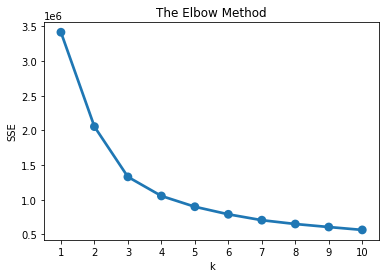

In [9]:
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_normalized)
    sse[k] = kmeans.inertia_   

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Applying Kmeans

Then we apply kmeans with k=3 to our dataframe previously normalized.

In [10]:
kmeans = KMeans(n_clusters=3, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

### Displaying data

Now that we have our 3 clusters, we display stats about each of them starting by the average value for each of our variables.

In [11]:
data_k3 = data.assign(Cluster=cluster_labels)
grouped = data_k3.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure        
           mean      mean          mean   mean   count
Cluster                                               
0           2.2      15.4          92.9   10.0  365175
1           7.1       3.2          19.0    8.5  360278
2           1.6       3.7          19.4    2.0  128061

To continue, we display a snake plot of each cluster's average normalized values. This allow us to directly see the profile of each cluster.

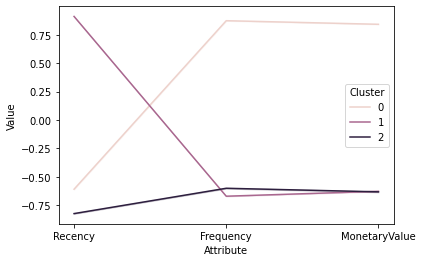

In [12]:
data_normalized = pd.DataFrame(
    data_normalized,
    index=data.index,
    columns=data.columns)
data_normalized['Cluster'] = data_k3['Cluster']

data_melt = pd.melt(data_normalized.reset_index(),
id_vars=['CLI_ID', 'Cluster'],
value_vars=['Recency', 'Frequency', 'MonetaryValue'],
var_name='Attribute',
value_name='Value')

sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt)
plt.show()

Finally, we plot an heatmap of relative values between each cluster to better compare them.

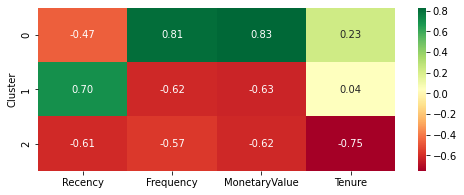

In [13]:
cluster_avg = data_k3.groupby(['Cluster']).mean()
population_avg = data.mean()
relative_imp = (cluster_avg / population_avg - 1).round(2)

plt.figure(figsize=(8, 3))
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

# Displaying client description

To display client statictical analysis, we just do basic operation over the dataframes we created previously.

In [14]:
client_id = 997048769
client = df[df['CLI_ID'] == client_id]
family = client['FAMILLE'].value_counts().sort_values(ascending=False).index[0]
maille = client['MAILLE'].value_counts().sort_values(ascending=False).index[0]
univers = client['UNIVERS'].value_counts().sort_values(ascending=False).index[0]
item = client['LIBELLE'].value_counts().sort_values(ascending=False).index[0]
price = client.agg({
    'PRIX_NET': ['mean', 'median', 'std', 'min', 'max'],
})

print('family', family)
print('maille', maille)
print('univers', univers)
print('item', item)
print(price)
print(pd.concat([clients.loc[client_id], data_k3.loc[client_id].drop(['MonetaryValue', 'Frequency'])]))

family MAQUILLAGE
maille MAQ_YEUX_CLASSIQUE
univers MAQ_YEUX Crayons
item KHOL VIOLINE AUTOMNE14 1,3G
         PRIX_NET
mean     7.265000
median   4.500000
std      6.085459
min      1.250000
max     20.900000
Items_purchased    10.00
Shopping_cart       3.00
Different_items     9.00
Spent              72.65
Recency             1.00
Tenure              3.00
Cluster             0.00
Name: 997048769, dtype: float64


_Family: Favorite family  
Maille: Favorite maille  
Univers: Favorite univers  
Item: Favorite item  
Tickets_count: Number of items bought  
Tickets_unique: Number of orders  
Items: Number of different items bought  
Spent: Total spent  
Recency: how many month since last purchase    
Tenure: How many month since first purchase_

# Recommender

## Item based

As we don't have client notation, we decided that the more a client has bought an item, the more he likes it.  
So we create a new dataframe putting in the y-axis each client, in the x-axis each products and at the intersection, how many times a client purchased this product.

In [16]:
df_new = df.groupby(['LIBELLE', 'CLI_ID']).agg(
    QUANTITY=('TICKET_ID', 'count')
).reset_index()

df_items = df_new.pivot_table(index='CLI_ID', columns='LIBELLE', values='QUANTITY').fillna(0).astype(int)
df_items.head()

LIBELLE,2010 KIT MAQ PDR,2013 GD PARFUME F200 ML EVIDENCE,2013-GD 200ML SO ELIXIR,2013-LAIT PARF 200 ML SO ELIXIR,2013COL 10ANS EDP50ML COMMEUNE EVIDENCE,2014 COLLECT EDP 50ML COMME UNE EVIDENCE,2014 COLLECTOR EDP 50ML SO ELIXIR PURPLE,25 LINGETTES DEFROISSANTES SV,49C ANTI CHUTE CURE STIM 60ML,AB SVA BRUM EXPR CORP FL150ML,...,VOILE CORPS SENTEUR NATURE 200,VOILE D' AMBRE BRUME DE PARFUM DEO100ML,VOILE DE NACRE OR/JAU NOEL10 A/TLU3 7ML,VOILE DE TT CLAIR NAT 01 LU4 30ML,VOILE DE TT MAT/NATUR 03 LU4 30ML,VOILE DE TT MEDIUM NAT 02 LU4 30ML,VOILE TT LUM3 BEIGE SOLEIL T30ML,ZERO TRACE SPRAY SPF 15 FL150,ZERO TRACE SPRAY SPF 30 150ML,x99SS GELEE FRUITS VANIL PN2 10ML
CLI_ID,,,,,,,,,,,,,,,,,,,,,
1490281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13290776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20163348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20200041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20561854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Then, we create a new dataframe with the correlations between the item our client purchased the most and all other items and sort it by correlation score.

In [17]:
recommendations = df_items.corrwith(df_items[item])
recommendations.dropna(inplace=True)
recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index().sort_values(by='correlation', ascending=False)
recommendations.head(10)

,LIBELLE,correlation
874,"KHOL VIOLINE AUTOMNE14 1,3G",1.000000
873,"KHOL OR AUTOMNE14 1,3G",0.203889
1471,VAO VIOLINE AUTOMNE14 3ML,0.078219
1041,OMBRE CREME OR AUTOMNE14 7ML,0.074055
559,FAP MONO 2013 CN3 VIOLET POP MAT 2G,0.063060
1017,NACRES LIBR OR ULTRA NACRE AUTOMNE14 3G,0.057916
1361,VAO AMETHYSTE AUTOMNE14 3ML,0.048192
1433,VAO OR AUTOMNE14 3ML,0.048182
819,GLOSS SEXY PULP OR AUTOMNE14 10ML,0.046624
1040,OMBRE CREME BRUN PRECIEUX AUTOMNE14 7ML,0.045105


## Simpler approach

Another very simple way to recommend a product is by looking the prefered family, maille or universe of a client and then recommend him the most purchased item in this family, maille or universe.

In [18]:
print(top_item_families.loc[family][0])
print(top_item_mailles.loc[maille][0])
print(top_item_universes.loc[univers][0])

PORTE MINE NOIR 01 CN3 0.3G
PORTE MINE NOIR 01 CN3 0.3G
CRAY KHOL NOIR 81 LUM4 1,3gr
